#Problem Statement:
The Management team at Walmart Inc. seeks to analyze customer purchase behavior, specifically focusing on the purchase amount in relation to the customer’s gender and various other demographic factors. The primary objective is to determine whether there are significant differences in spending habits between male and female customers, especially during Black Friday sales.
The analysis will provide Walmart's management team with a clear understanding of gender-based spending patterns and how various demographic factors influence these patterns. This information will support data-driven decision-making to enhance marketing strategies, optimize inventory, and improve customer satisfaction.

#Downloading the Dataset

In [1]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
To: /content/walmart_data.csv?1641285094
100% 23.0M/23.0M [00:00<00:00, 92.0MB/s]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, norm, expon, poisson

In [3]:
df = pd.read_csv('walmart_data.csv?1641285094')

In [4]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [6]:
df.shape

(550068, 10)

In [36]:
df.ndim

2

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [8]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


#Checking for null values in dataset


In [10]:
df.isnull().sum()
#No null values found

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

#Checking for each column unique values count

In [11]:
df['User_ID'].nunique()

5891

In [13]:
df['Product_ID'].nunique()

3631

In [14]:
df['Gender'].nunique()

2

In [15]:
df['Age'].nunique()

7

In [16]:
df['Occupation'].nunique()

21

In [17]:
df['City_Category'].nunique()

3

In [19]:
df['Stay_In_Current_City_Years'].nunique()

5

In [20]:
df['Marital_Status'].nunique()

2

In [21]:
df['Product_Category'].nunique()

20

In [22]:
df['Purchase'].nunique()

18105

#Grouping User Ids and Product Ids and their counts

In [23]:
df.groupby('User_ID')['Product_ID'].value_counts()

User_ID  Product_ID
1000001  P00000142     1
         P00004842     1
         P00142242     1
         P00297042     1
         P00289942     1
                      ..
1006040  P00146442     1
         P00145742     1
         P00143142     1
         P00134342     1
         P00349442     1
Name: count, Length: 550068, dtype: int64

In [24]:
df.groupby('Product_ID')['Product_Category'].describe()

,count,mean,std,min,25%,50%,75%,max
Product_ID,,,,,,,,
P00000142,1152.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0
P00000242,376.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0
P00000342,244.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0
P00000442,92.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0
P00000542,149.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...
P0099442,200.0,6.0,0.0,6.0,6.0,6.0,6.0,6.0
P0099642,13.0,8.0,0.0,8.0,8.0,8.0,8.0,8.0
P0099742,126.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0


In [ ]:
df['Product_ID'].describe()

In [27]:
unique_products_count = df['Product_ID'].nunique()
unique_products_count

3631

In [30]:
prod = df['Product_ID']
prod

0         P00069042
1         P00248942
2         P00087842
3         P00085442
4         P00285442
            ...    
550063    P00372445
550064    P00375436
550065    P00375436
550066    P00375436
550067    P00371644
Name: Product_ID, Length: 550068, dtype: object

In [31]:
bins = df[['User_ID', 'Age']]
bins

,User_ID,Age
0,1000001,0-17
1,1000001,0-17
2,1000001,0-17
3,1000001,0-17
4,1000002,55+
...,...,...
550063,1006033,51-55
550064,1006035,26-35
550065,1006036,26-35
550066,1006038,55+


<Axes: ylabel='Count'>

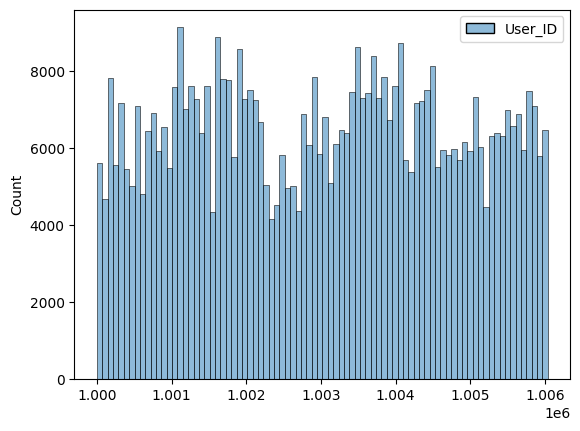

In [32]:
sns.histplot(data=bins)

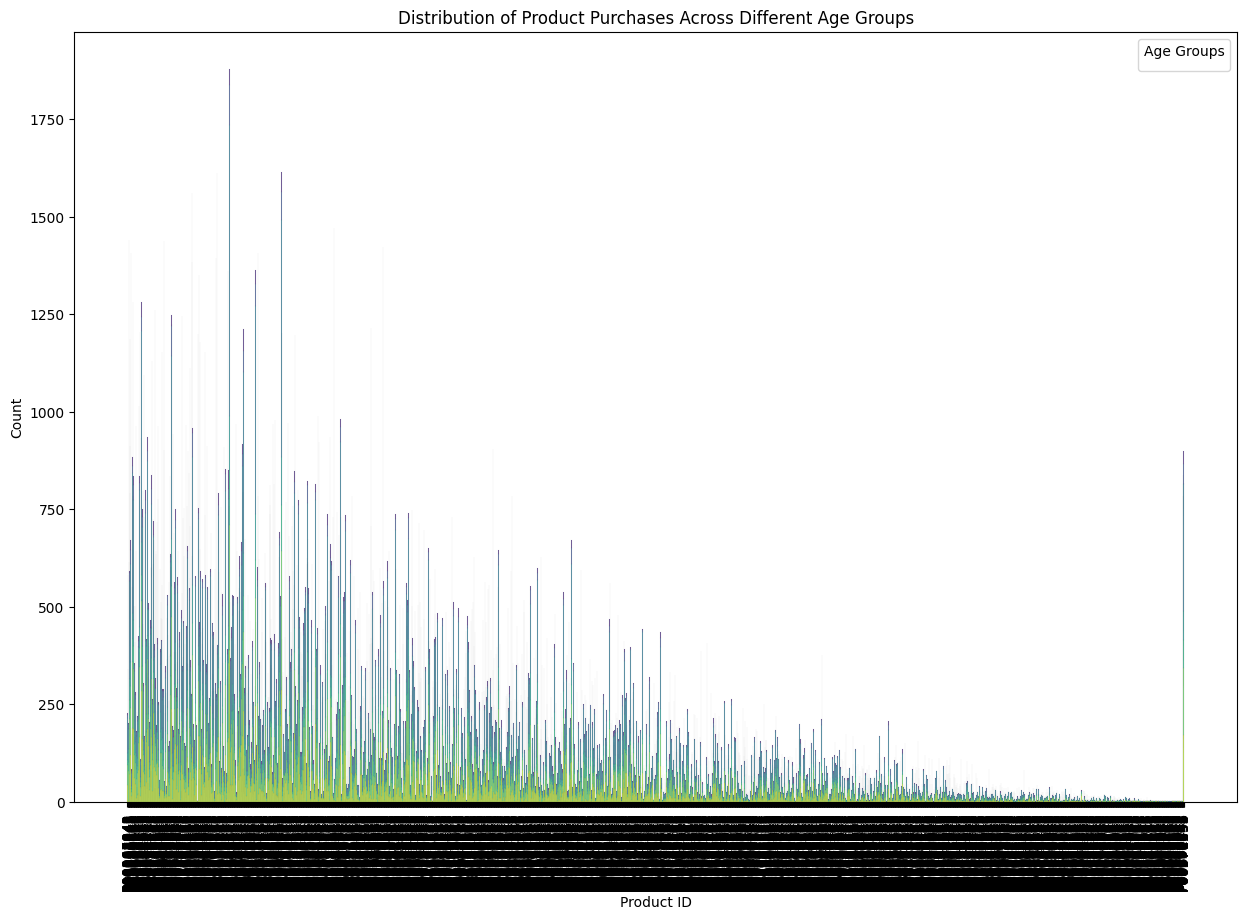

In [33]:
plt.figure(figsize=(15, 10))
sns.histplot(data=df, x='Product_ID', hue='Age', multiple='stack', palette='viridis')

# Add labels and title
plt.xlabel('Product ID')
plt.ylabel('Count')
plt.title('Distribution of Product Purchases Across Different Age Groups')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Age Groups')
plt.show()

#Find the outliers for every continuous variable in the dataset

In [34]:
continuous_columns = ['User_ID', 'Occupation', 'Marital_Status', 'Product_Category', 'Purchase']

# Calculate the 5th and 95th percentiles and clip the data
for column in continuous_columns:
    lower_bound = np.percentile(df[column], 5)
    upper_bound = np.percentile(df[column], 95)
    df[column] = np.clip(df[column], lower_bound, upper_bound)

print("Data clipped between 5th and 95th percentiles for continuous variables.")

# Verify the clipping
for column in continuous_columns:
    print(f"\n{column} after clipping:")
    print(df[column].describe())

Data clipped between 5th and 95th percentiles for continuous variables.

User_ID after clipping:
count    5.500680e+05
mean     1.003030e+06
std      1.703137e+03
min      1.000329e+06
25%      1.001516e+06
50%      1.003077e+06
75%      1.004478e+06
max      1.005747e+06
Name: User_ID, dtype: float64

Occupation after clipping:
count    550068.000000
mean          8.076707
std           6.522660
min           0.000000
25%           2.000000
50%           7.000000
75%          14.000000
max          20.000000
Name: Occupation, dtype: float64

Marital_Status after clipping:
count    550068.000000
mean          0.409653
std           0.491770
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Marital_Status, dtype: float64

Product_Category after clipping:
count    550068.000000
mean          5.242486
std           3.508509
min           1.000000
25%           1.000000
50%           5.000000
75%           8.000000
max 

# Detecting outliers using boxplots for continuous variables

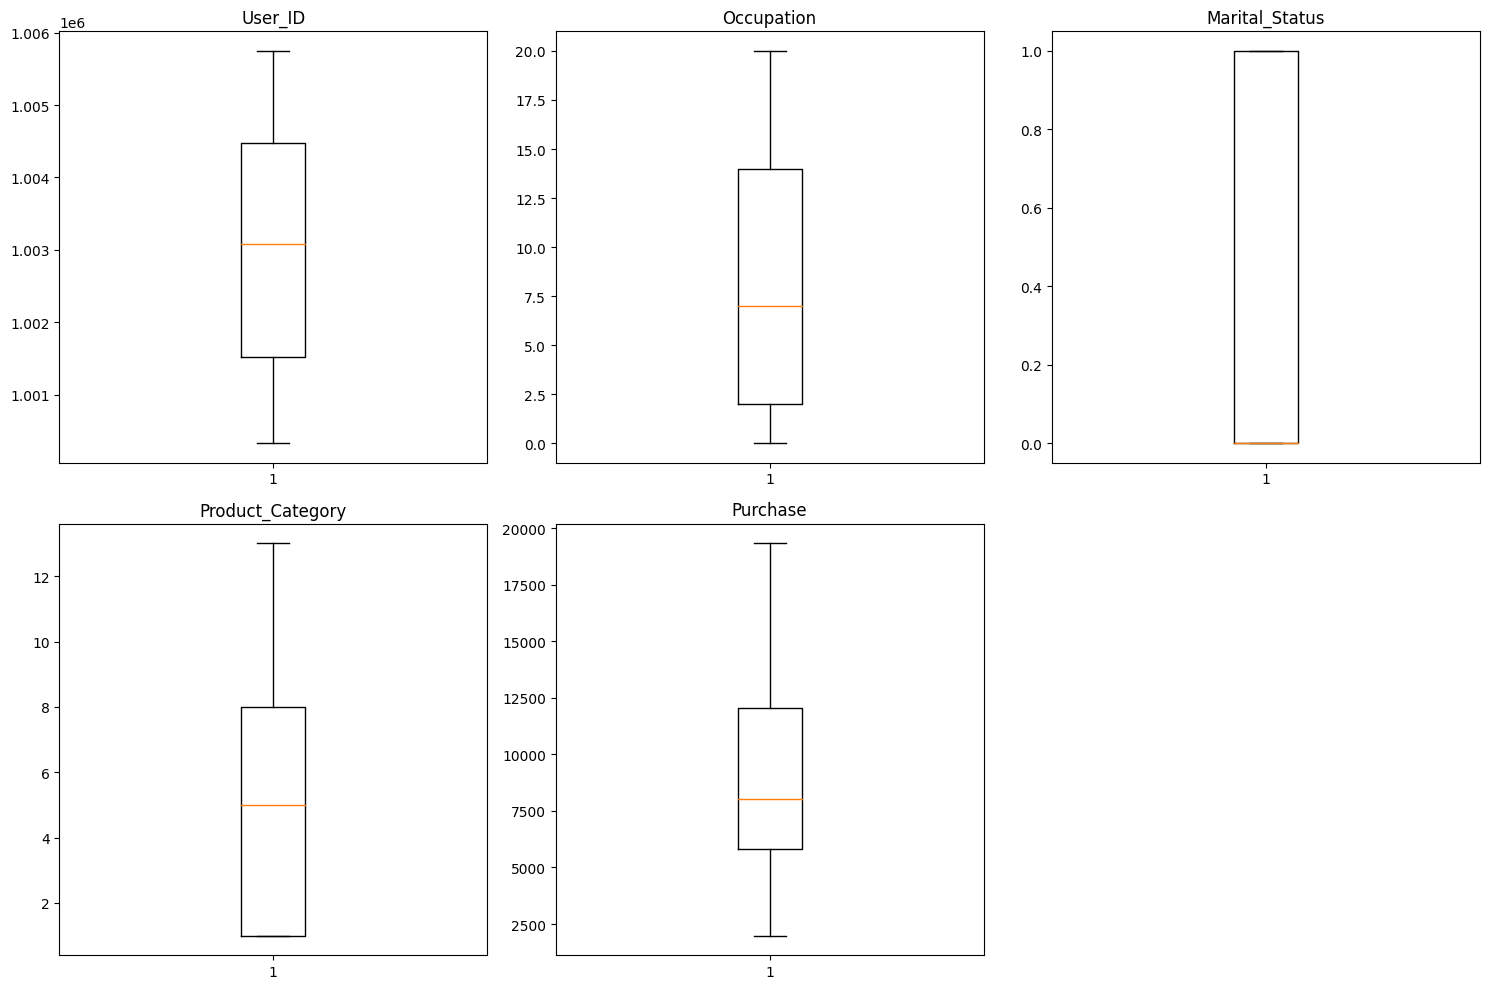

In [35]:
continuous_columns = ['User_ID', 'Occupation', 'Marital_Status', 'Product_Category', 'Purchase']

# Plotting boxplots to visualize outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(continuous_columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

# Plotting histplot to visualize the relationship between Product_ID and Age

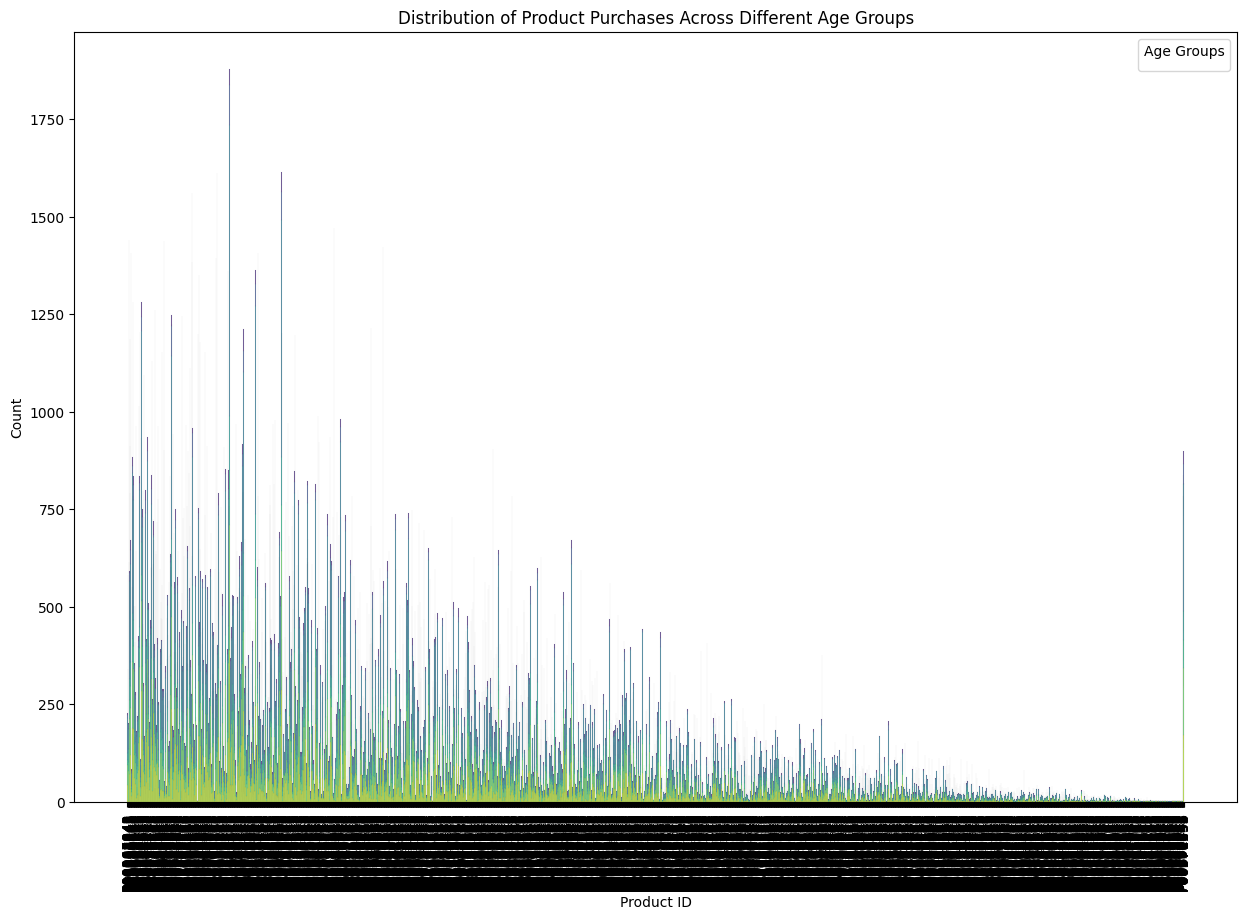

In [37]:
plt.figure(figsize=(15, 10))
sns.histplot(data=df, x='Product_ID', hue='Age', multiple='stack', palette='viridis')

# Add labels and title
plt.xlabel('Product ID')
plt.ylabel('Count')
plt.title('Distribution of Product Purchases Across Different Age Groups')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Age Groups')
plt.show()

#Relationship between age, marital status, and the amount spent

In [40]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Age_encoded
0,1000329,P00069042,F,0-17,10,A,2,0,3,8370,0-17
1,1000329,P00248942,F,0-17,10,A,2,0,1,15200,0-17
2,1000329,P00087842,F,0-17,10,A,2,0,12,1984,0-17
3,1000329,P00085442,F,0-17,10,A,2,0,12,1984,0-17
4,1000329,P00285442,M,55+,16,C,4+,0,8,7969,55+


In [54]:
df_corr = df.iloc[:,[7,9]]
correlation_matrix = df_corr.corr()
correlation_matrix

,Marital_Status,Purchase
Marital_Status,1.000000,-0.000522
Purchase,-0.000522,1.000000


# Plotting Boxplot to visualize the relationship between Age, Marital Status, and Purchase Amount

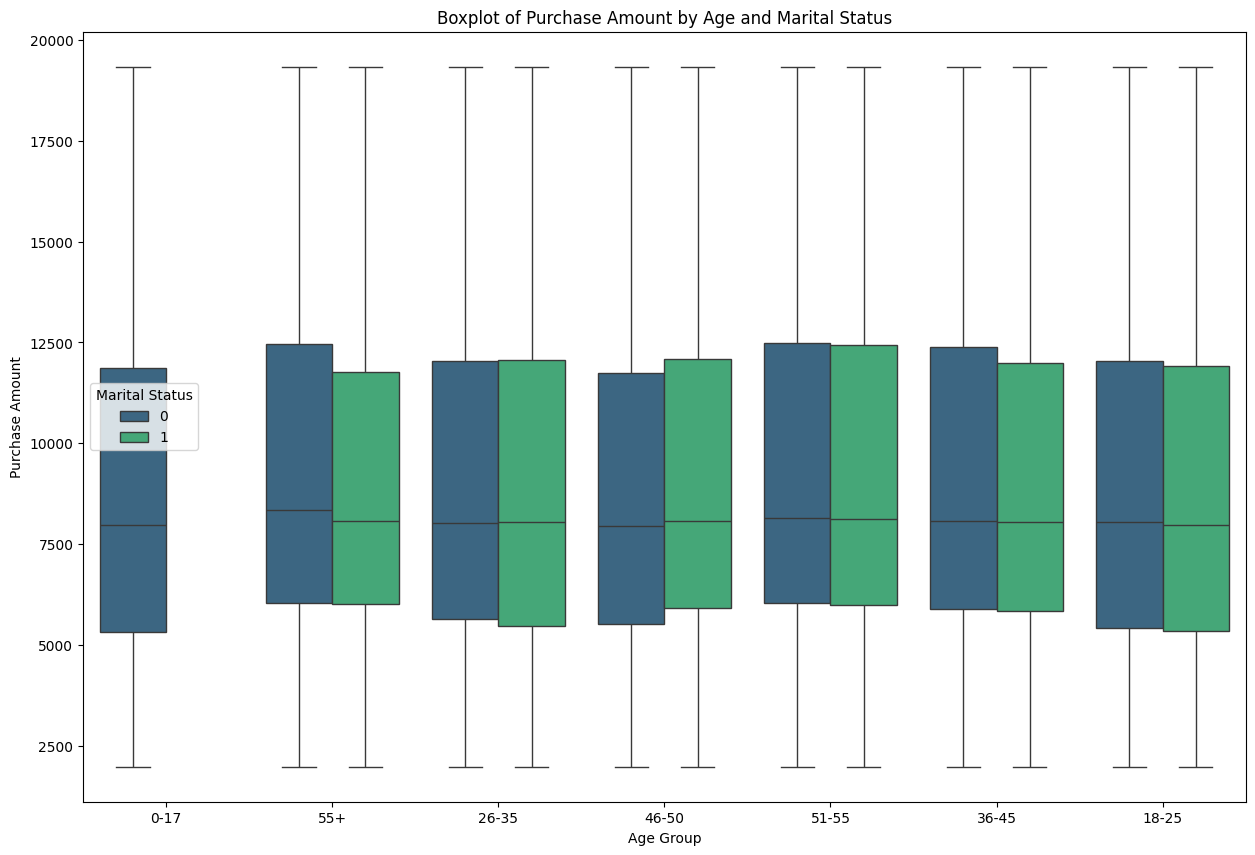

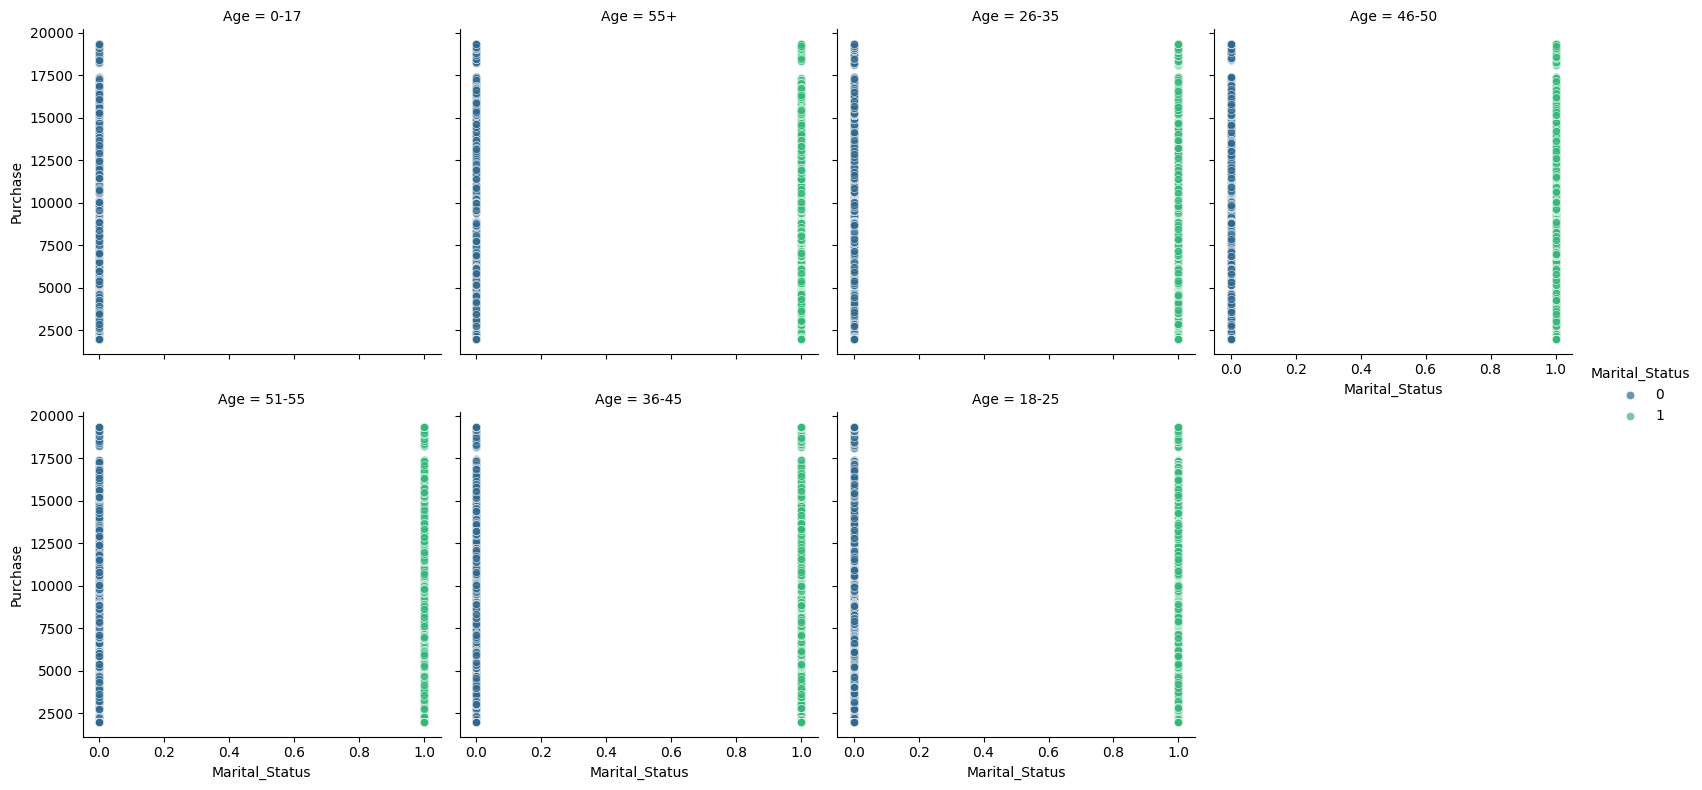

In [64]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Age', y='Purchase', hue='Marital_Status', data=df, palette='viridis')
plt.title('Boxplot of Purchase Amount by Age and Marital Status')
plt.xlabel('Age Group')
plt.ylabel('Purchase Amount')
plt.legend(title='Marital Status')
plt.show()

# Using FacetGrid to show scatter plots of Purchase Amount by Age and Marital Status
g = sns.FacetGrid(df, col='Age', hue='Marital_Status', col_wrap=4, height=4, palette='viridis')
g.map(sns.scatterplot, 'Marital_Status', 'Purchase', alpha=0.7)
g.add_legend()
plt.show()


# Plotting histograms to visualize the preferred product categories for different genders

<Figure size 1500x1000 with 0 Axes>

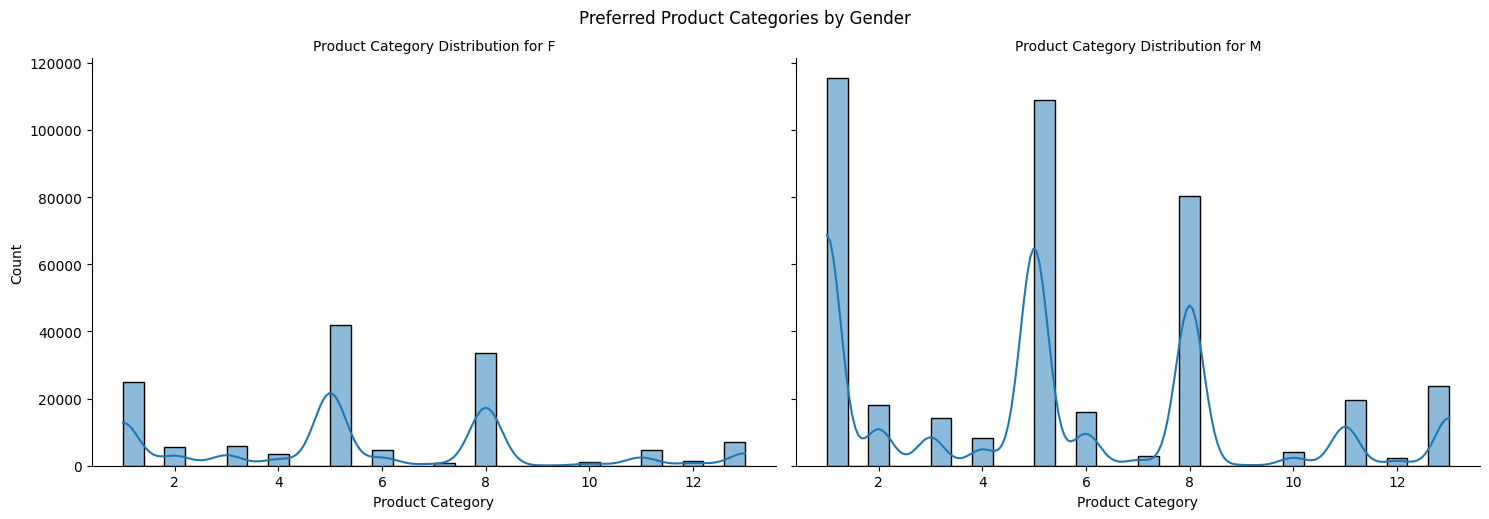

In [67]:
plt.figure(figsize=(15, 10))

# Using FacetGrid to create separate histograms for each gender
g = sns.FacetGrid(df, col='Gender', height=5, aspect=1.5)
g.map(sns.histplot, 'Product_Category', kde=True, bins=30)

# Add labels and title
g.set_axis_labels('Product Category', 'Count')
g.set_titles('Product Category Distribution for {col_name}')
plt.suptitle('Preferred Product Categories by Gender', y=1.03)
plt.show()

In [84]:
Prod_Gender = df.groupby('Product_Category')['Gender'].value_counts()
Prod_Gender

Product_Category  Gender
1                 M         115547
                  F          24831
2                 M          18206
                  F           5658
3                 M          14207
                  F           6006
4                 M           8114
                  F           3639
5                 M         108972
                  F          41961
6                 M          15907
                  F           4559
7                 M           2778
                  F            943
8                 M          80367
                  F          33558
9                 M            340
                  F             70
10                M           3963
                  F           1162
11                M          19548
                  F           4739
12                M           2415
                  F           1532
13                M          23895
                  F           7151
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Count'>

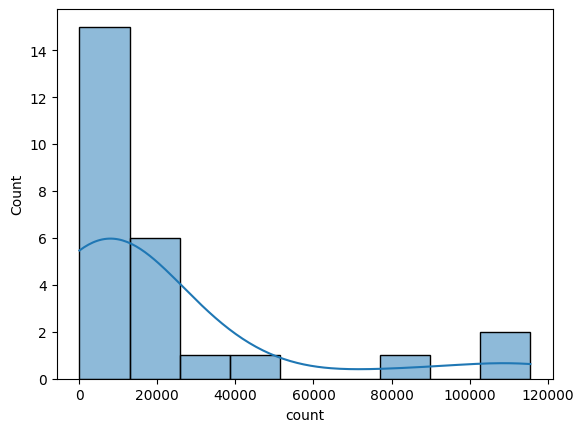

In [85]:
sns.histplot(data=Prod_Gender,kde=True)

In [88]:
import scipy.stats as stats
def compute_confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    sem = stats.sem(data)  # Standard error of the mean
    margin_of_error = sem * stats.t.ppf((1 + confidence) / 2., len(data) - 1)
    return mean, mean - margin_of_error, mean + margin_of_error


In [89]:
# Separate data by gender
male_purchase = df[df['Gender'] == 'M']['Purchase']
female_purchase = df[df['Gender'] == 'F']['Purchase']

# Compute confidence intervals
male_ci = compute_confidence_interval(male_purchase)
female_ci = compute_confidence_interval(female_purchase)

print(f"Male Purchase CI: {male_ci}")
print(f"Female Purchase CI: {female_ci}")


Male Purchase CI: (9427.240996574606, 9412.240567188413, 9442.2414259608)
Female Purchase CI: (8736.540266109021, 8712.091286628549, 8760.989245589493)


In [90]:
def bootstrap_confidence_interval(data, sample_size, n_iterations=1000, confidence=0.95):
    bootstrap_means = []
    for _ in range(n_iterations):
        sample = np.random.choice(data, size=sample_size, replace=True)
        bootstrap_means.append(np.mean(sample))
    mean = np.mean(bootstrap_means)
    lower_bound = np.percentile(bootstrap_means, (1 - confidence) / 2 * 100)
    upper_bound = np.percentile(bootstrap_means, (1 + confidence) / 2 * 100)
    return mean, lower_bound, upper_bound

# Sample sizes
sample_sizes = [300, 3000, 30000]

# Compute bootstrap confidence intervals for each sample size
bootstrap_results = {'Male': {}, 'Female': {}}
for sample_size in sample_sizes:
    bootstrap_results['Male'][sample_size] = bootstrap_confidence_interval(male_purchase, sample_size)
    bootstrap_results['Female'][sample_size] = bootstrap_confidence_interval(female_purchase, sample_size)

print(bootstrap_results)


{'Male': {300: (9426.649453333333, 8870.575166666666, 9983.152583333333), 3000: (9427.098078333333, 9261.476958333333, 9610.227266666667), 30000: (9426.710879333332, 9369.580069166666, 9484.522994166666)}, 'Female': {300: (8744.14087, 8215.34925, 9269.16275), 3000: (8736.691774333334, 8569.172391666667, 8902.963725000001), 30000: (8736.9467881, 8689.8841775, 8787.848755833333)}}


# Plotting the confidence intervals

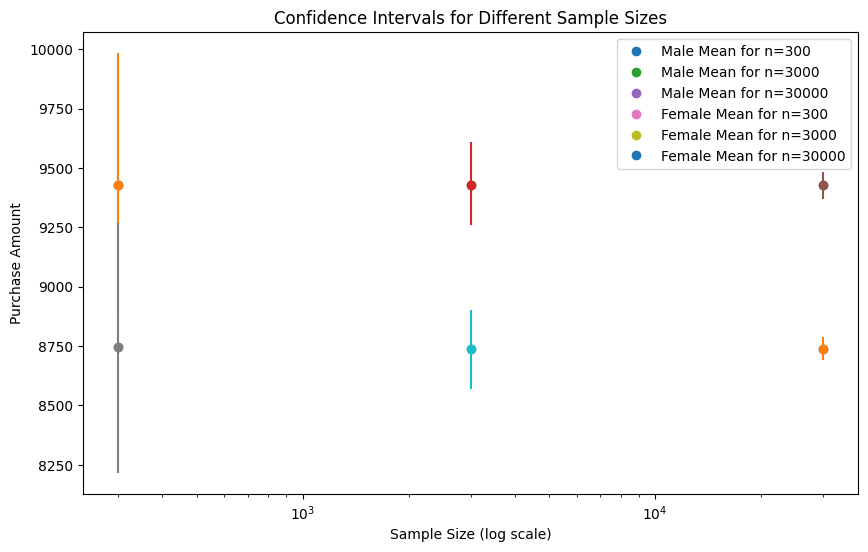

In [91]:
fig, ax = plt.subplots(figsize=(10, 6))

for gender in bootstrap_results:
    for sample_size in sample_sizes:
        ci = bootstrap_results[gender][sample_size]
        ax.plot([sample_size], [ci[0]], 'o', label=f'{gender} Mean for n={sample_size}')
        ax.errorbar([sample_size], [ci[0]], yerr=[[ci[0] - ci[1]], [ci[2] - ci[0]]], fmt='o')

ax.set_xscale('log')
ax.set_xlabel('Sample Size (log scale)')
ax.set_ylabel('Purchase Amount')
ax.set_title('Confidence Intervals for Different Sample Sizes')
ax.legend(loc='upper right')
plt.show()


With larger sample sizes, the distribution of the sample means tends to be more normally distributed due to the Central Limit Theorem, and the standard error decreases, leading to narrower confidence intervals.



In [92]:
def compute_confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    sem = stats.sem(data)  # Standard error of the mean
    margin_of_error = sem * stats.t.ppf((1 + confidence) / 2., len(data) - 1)
    return mean, mean - margin_of_error, mean + margin_of_error


# Separate data by marital status

In [93]:

married_purchase = df[df['Marital_Status'] == 1]['Purchase']
single_purchase = df[df['Marital_Status'] == 0]['Purchase']

# Compute confidence intervals
married_ci = compute_confidence_interval(married_purchase)
single_ci = compute_confidence_interval(single_purchase)

print(f"Married Purchase CI: {married_ci}")
print(f"Single Purchase CI: {single_ci}")


Married Purchase CI: (9253.669823420034, 9233.671561201889, 9273.668085638179)
Single Purchase CI: (9258.820463706883, 9242.08902387034, 9275.551903543426)


Confidence Intervals for Smaller Sample Sizes Using Bootstrapping

In [94]:
def bootstrap_confidence_interval(data, sample_size, n_iterations=1000, confidence=0.95):
    bootstrap_means = []
    for _ in range(n_iterations):
        sample = np.random.choice(data, size=sample_size, replace=True)
        bootstrap_means.append(np.mean(sample))
    mean = np.mean(bootstrap_means)
    lower_bound = np.percentile(bootstrap_means, (1 - confidence) / 2 * 100)
    upper_bound = np.percentile(bootstrap_means, (1 + confidence) / 2 * 100)
    return mean, lower_bound, upper_bound

# Sample sizes
sample_sizes = [300, 3000, 30000]

# Compute bootstrap confidence intervals for each sample size
bootstrap_results = {'Married': {}, 'Single': {}}
for sample_size in sample_sizes:
    bootstrap_results['Married'][sample_size] = bootstrap_confidence_interval(married_purchase, sample_size)
    bootstrap_results['Single'][sample_size] = bootstrap_confidence_interval(single_purchase, sample_size)

print(bootstrap_results)


{'Married': {300: (9243.80279, 8707.39225, 9801.531583333333), 3000: (9254.308013999998, 9083.305708333333, 9426.974916666668), 30000: (9252.083172566665, 9202.767981666666, 9304.270256666667)}, 'Single': {300: (9260.568620000002, 8714.889333333333, 9832.739166666666), 3000: (9260.165211000001, 9084.1799, 9431.955391666666), 30000: (9259.787827833332, 9203.952516666666, 9315.75959)}}


In [95]:
for status in bootstrap_results:
    for sample_size in sample_sizes:
        ci = bootstrap_results[status][sample_size]
        print(f"{status} Purchase CI for sample size {sample_size}: {ci}")


Married Purchase CI for sample size 300: (9243.80279, 8707.39225, 9801.531583333333)
Married Purchase CI for sample size 3000: (9254.308013999998, 9083.305708333333, 9426.974916666668)
Married Purchase CI for sample size 30000: (9252.083172566665, 9202.767981666666, 9304.270256666667)
Single Purchase CI for sample size 300: (9260.568620000002, 8714.889333333333, 9832.739166666666)
Single Purchase CI for sample size 3000: (9260.165211000001, 9084.1799, 9431.955391666666)
Single Purchase CI for sample size 30000: (9259.787827833332, 9203.952516666666, 9315.75959)


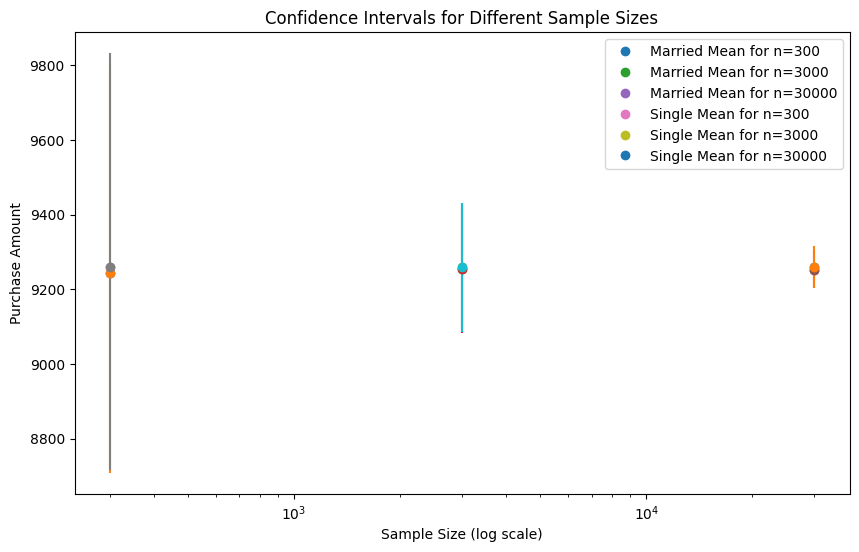

In [96]:
# Plotting the confidence intervals
fig, ax = plt.subplots(figsize=(10, 6))

for status in bootstrap_results:
    for sample_size in sample_sizes:
        ci = bootstrap_results[status][sample_size]
        ax.plot([sample_size], [ci[0]], 'o', label=f'{status} Mean for n={sample_size}')
        ax.errorbar([sample_size], [ci[0]], yerr=[[ci[0] - ci[1]], [ci[2] - ci[0]]], fmt='o')

ax.set_xscale('log')
ax.set_xlabel('Sample Size (log scale)')
ax.set_ylabel('Purchase Amount')
ax.set_title('Confidence Intervals for Different Sample Sizes')
ax.legend(loc='upper right')
plt.show()


With larger sample sizes, the distribution of the sample means tends to be more normally distributed due to the Central Limit Theorem, and the standard error decreases, leading to narrower confidence intervals.

In [97]:
def compute_confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    sem = stats.sem(data)  # Standard error of the mean
    margin_of_error = sem * stats.t.ppf((1 + confidence) / 2., len(data) - 1)
    return mean, mean - margin_of_error, mean + margin_of_error


# Separate data by age group

In [99]:

age_groups = df['Age'].unique()
age_group_purchase = {age: df[df['Age'] == age]['Purchase'] for age in age_groups}

# Compute confidence intervals for each age group
age_group_ci = {age: compute_confidence_interval(data) for age, data in age_group_purchase.items()}

print(age_group_ci)


{'0-17': (8940.64905310555, 8861.845623049276, 9019.452483161824), '55+': (9327.796549479166, 9263.90624125738, 9391.686857700952), '26-35': (9243.780119041656, 9223.472753527034, 9264.087484556278), '46-50': (9204.211483337345, 9160.331729016474, 9248.091237658216), '51-55': (9514.863250305187, 9466.180145811135, 9563.546354799239), '36-45': (9322.92190922891, 9294.276340526665, 9351.567477931154), '18-25': (9169.010977322898, 9138.654510846953, 9199.367443798843)}


#Bootstrapping

In [100]:
def bootstrap_confidence_interval(data, sample_size, n_iterations=1000, confidence=0.95):
    bootstrap_means = []
    for _ in range(n_iterations):
        sample = np.random.choice(data, size=sample_size, replace=True)
        bootstrap_means.append(np.mean(sample))
    mean = np.mean(bootstrap_means)
    lower_bound = np.percentile(bootstrap_means, (1 - confidence) / 2 * 100)
    upper_bound = np.percentile(bootstrap_means, (1 + confidence) / 2 * 100)
    return mean, lower_bound, upper_bound

# Sample sizes
sample_sizes = [300, 3000, 30000]

# Compute bootstrap confidence intervals for each age group and sample size
bootstrap_results = {age: {} for age in age_groups}
for age in age_groups:
    for sample_size in sample_sizes:
        bootstrap_results[age][sample_size] = bootstrap_confidence_interval(age_group_purchase[age], sample_size)

print(bootstrap_results)


{'0-17': {300: (8932.89117, 8397.586333333333, 9481.671333333334), 3000: (8940.103872333333, 8773.212716666667, 9109.194474999998), 30000: (8940.8492491, 8884.979640833333, 8999.4427475)}, '55+': {300: (9316.099293333333, 8820.196416666666, 9873.428333333333), 3000: (9324.772481333333, 9162.682975, 9486.490016666667), 30000: (9329.397022466666, 9274.25627, 9382.512070833332)}, '26-35': {300: (9232.787666666667, 8659.74175, 9775.058166666668), 3000: (9239.730757000001, 9067.69505, 9407.938199999999), 30000: (9242.840699166667, 9187.999550833334, 9297.65406)}, '46-50': {300: (9216.302153333332, 8679.498333333333, 9750.56775), 3000: (9207.176725000001, 9033.945625, 9379.190574999999), 30000: (9205.215132299998, 9146.00935, 9258.671676666667)}, '51-55': {300: (9525.491483333333, 8953.23625, 10052.096833333333), 3000: (9512.027491666666, 9345.881175, 9701.500341666666), 30000: (9515.1074585, 9456.778468333332, 9569.917143333332)}, '36-45': {300: (9335.280873333333, 8757.367166666667, 9885.9

In [101]:
for age, ci in age_group_ci.items():
    print(f"Confidence Interval for Age Group {age} (entire dataset): {ci}")


Confidence Interval for Age Group 0-17 (entire dataset): (8940.64905310555, 8861.845623049276, 9019.452483161824)
Confidence Interval for Age Group 55+ (entire dataset): (9327.796549479166, 9263.90624125738, 9391.686857700952)
Confidence Interval for Age Group 26-35 (entire dataset): (9243.780119041656, 9223.472753527034, 9264.087484556278)
Confidence Interval for Age Group 46-50 (entire dataset): (9204.211483337345, 9160.331729016474, 9248.091237658216)
Confidence Interval for Age Group 51-55 (entire dataset): (9514.863250305187, 9466.180145811135, 9563.546354799239)
Confidence Interval for Age Group 36-45 (entire dataset): (9322.92190922891, 9294.276340526665, 9351.567477931154)
Confidence Interval for Age Group 18-25 (entire dataset): (9169.010977322898, 9138.654510846953, 9199.367443798843)


In [102]:
for age in bootstrap_results:
    for sample_size in sample_sizes:
        ci = bootstrap_results[age][sample_size]
        print(f"Age Group {age} Purchase CI for sample size {sample_size}: {ci}")


Age Group 0-17 Purchase CI for sample size 300: (8932.89117, 8397.586333333333, 9481.671333333334)
Age Group 0-17 Purchase CI for sample size 3000: (8940.103872333333, 8773.212716666667, 9109.194474999998)
Age Group 0-17 Purchase CI for sample size 30000: (8940.8492491, 8884.979640833333, 8999.4427475)
Age Group 55+ Purchase CI for sample size 300: (9316.099293333333, 8820.196416666666, 9873.428333333333)
Age Group 55+ Purchase CI for sample size 3000: (9324.772481333333, 9162.682975, 9486.490016666667)
Age Group 55+ Purchase CI for sample size 30000: (9329.397022466666, 9274.25627, 9382.512070833332)
Age Group 26-35 Purchase CI for sample size 300: (9232.787666666667, 8659.74175, 9775.058166666668)
Age Group 26-35 Purchase CI for sample size 3000: (9239.730757000001, 9067.69505, 9407.938199999999)
Age Group 26-35 Purchase CI for sample size 30000: (9242.840699166667, 9187.999550833334, 9297.65406)
Age Group 46-50 Purchase CI for sample size 300: (9216.302153333332, 8679.498333333333, 

# Plotting the confidence intervals

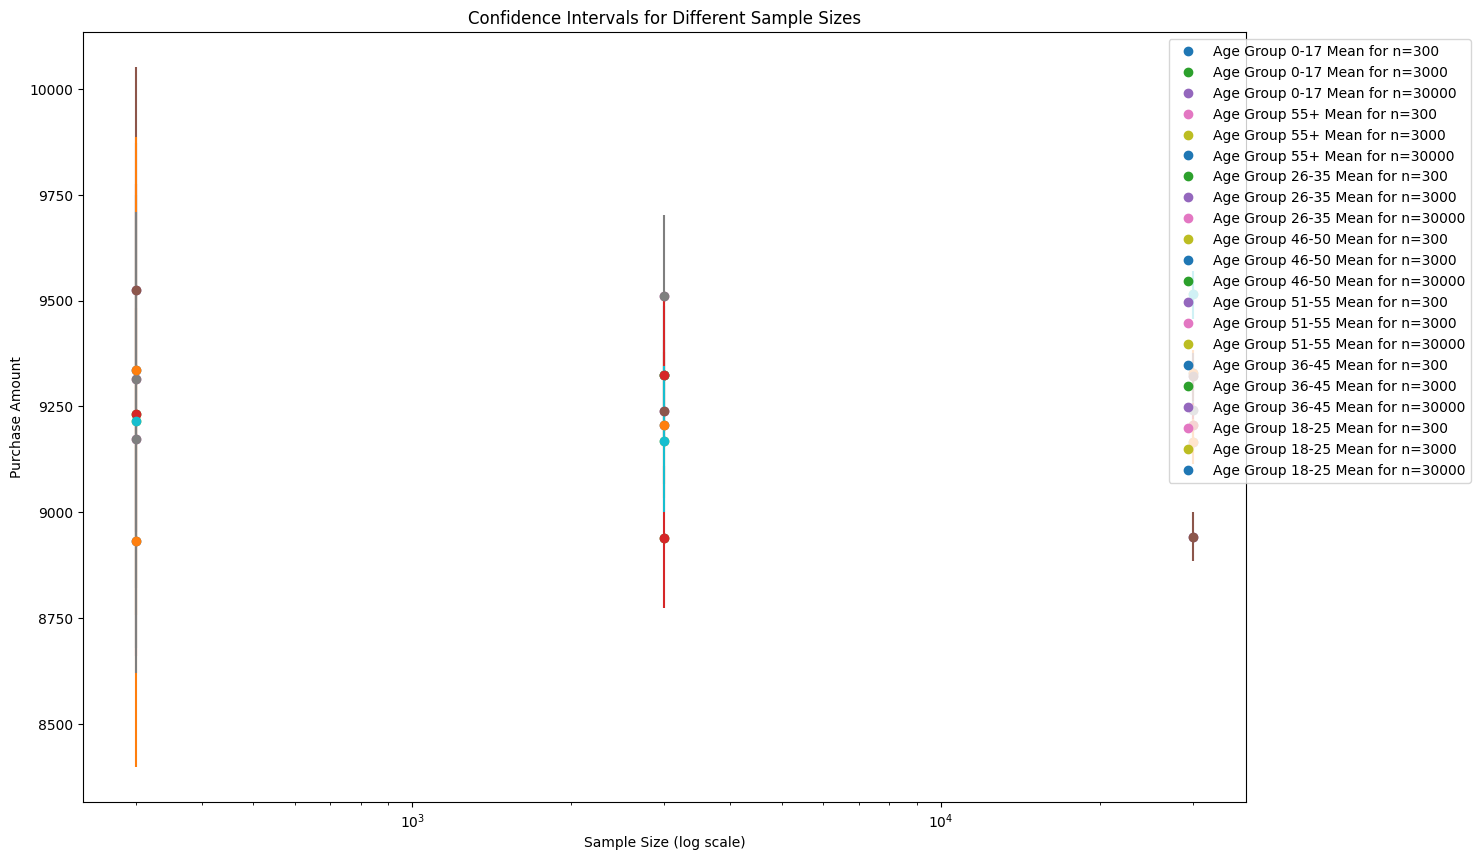

In [103]:
fig, ax = plt.subplots(figsize=(15, 10))

for age in bootstrap_results:
    for sample_size in sample_sizes:
        ci = bootstrap_results[age][sample_size]
        ax.plot([sample_size], [ci[0]], 'o', label=f'Age Group {age} Mean for n={sample_size}')
        ax.errorbar([sample_size], [ci[0]], yerr=[[ci[0] - ci[1]], [ci[2] - ci[0]]], fmt='o')

ax.set_xscale('log')
ax.set_xlabel('Sample Size (log scale)')
ax.set_ylabel('Purchase Amount')
ax.set_title('Confidence Intervals for Different Sample Sizes')
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


With larger sample sizes, the distribution of the sample means tends to be more normally distributed due to the Central Limit Theorem, and the standard error decreases, leading to narrower confidence intervals.

In [104]:
# Separate data by gender
male_purchase = df[df['Gender'] == 'M']['Purchase']
female_purchase = df[df['Gender'] == 'F']['Purchase']

# Compute confidence intervals
male_ci = compute_confidence_interval(male_purchase)
female_ci = compute_confidence_interval(female_purchase)

print(f"Male Purchase CI: {male_ci}")
print(f"Female Purchase CI: {female_ci}")


Male Purchase CI: (9427.240996574606, 9412.240567188413, 9442.2414259608)
Female Purchase CI: (8736.540266109021, 8712.091286628549, 8760.989245589493)


In [105]:
# Check if confidence intervals overlap
male_lower, male_upper = male_ci[1], male_ci[2]
female_lower, female_upper = female_ci[1], female_ci[2]

overlap = not (male_upper < female_lower or female_upper < male_lower)
print(f"Do the confidence intervals overlap? {overlap}")


Do the confidence intervals overlap? False


Interpretation
If the confidence intervals overlap:

1. This suggests that there is no statistically significant difference in the average amount spent by males and females.
Walmart could leverage this by:
2. Designing marketing strategies that are gender-neutral since spending patterns do not significantly differ.
3. Focusing on factors other than gender to segment and target their customer base, such as age, marital status, or geographic location.




If the confidence intervals do not overlap:

1. This indicates a statistically significant difference in the average amount spent by males and females.
Walmart could leverage this by:
2. Tailoring marketing campaigns to specifically target the gender that spends more, potentially increasing their overall revenue.
3. Analyzing the products that each gender prefers and stocking accordingly to meet demand.
4. Creating personalized shopping experiences or loyalty programs that cater to the specific spending behaviors of each gender.

----Concluding Remarks---
Based on the above analysis, Walmart can make data-driven decisions to optimize their marketing strategies, inventory management, and customer engagement programs. By understanding whether the spending habits of males and females significantly differ or not, Walmart can effectively tailor their business strategies to maximize customer satisfaction and revenue.